# Drawing from 3 probabilities and the sum should be 1


In [2]:
# !pip install ipywidgets

In [8]:
from ipywidgets import interact
import numpy as np
from scipy.linalg import svd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
from ipywidgets import interactive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import dirichlet
import warnings
warnings.filterwarnings('ignore')

def visualize_dirichlet(al,be,ce):
    # Generate 1000 draws from a Dirichlet distribution with alpha=[2, 3, 5]
    n_samples = 1000
    alpha = [al, be, ce]
    samples = dirichlet.rvs(alpha, size=n_samples)

    # Split the samples into a, b, and c
    a = samples[:, 0]
    b = samples[:, 1]
    c = samples[:, 2]

    # Check that the sum is close to 1 for each draw
    # assert np.allclose(a + b + c, 1, atol=1e-6)
    # Check that the sum is equal to 1 for each draw
    np.testing.assert_almost_equal(a + b + c, 1, decimal=12)

    # Prepare data for plotting
    df = pd.DataFrame({'a': a, 'b': b, 'c': c})

    # Plot the distributions on a single axis using seaborn
    ax = sns.histplot(df, kde=True)
    ax.get_figure().set_figheight(3)
    print(al,be,ce)
    plt.show()

interactive_plot = interactive(visualize_dirichlet, al=(0, 15, 0.1), be=(0, 15, 0.1), ce=(0, 15, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=7.0, description='al', max=15.0), FloatSlider(value=7.0, description='…

In [5]:
# for the fit, we only want to set the mode of the price weight distributions, and calculate the others
# assuming
from components.probability import desired_modes_from_price_mode, dirichlet_alphas, dirichlet_modes
for mode_pw in np.linspace(0.1, 0.9, 9):
    modes = desired_modes_from_price_mode(mode_pw)    
    alphas = dirichlet_alphas(modes)


    

alpha = [1.308e+01,  4.452e+00,  2.726e+00]
modes = dirichlet_modes(alpha)
print(modes, sum (modes))

[0.69996523 0.20002318 0.10001159] 1.0


In [6]:
from scipy.optimize import minimize
# Apparently, its not possible to calculate the modes of a Dirichlet distribution.
# Instead, lets try to aim for lets say 
desired_modes = np.array([0.3, 0.25, 0.15])


res = minimize(lambda x: np.linalg.norm(desired_modes - dirichlet_modes(x)), alpha, method="L-BFGS-B")#, options={"maxiter":1000})
print(",".join(f"{x:.3f}" for x in res.x),dirichlet_modes(res.x))
print("max diff:", np.max(np.abs((dirichlet_modes(res.x)-desired_modes))))


9.833,8.729,6.521 [0.3999974  0.34999993 0.25000267]
max diff: 0.10000267451469083


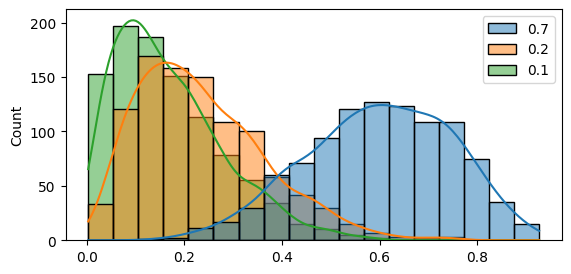

In [7]:
n_samples = 1000

alphas = dirichlet_alphas([0.7, 0.2, 0.1])

samples = dirichlet.rvs(alphas, size=n_samples)

# Split the samples into a, b, and c
a = samples[:, 0]
b = samples[:, 1]
c = samples[:, 2]

# Check that the sum is equal to 1 for each draw
np.testing.assert_almost_equal(a + b + c, 1, decimal=12)

# Prepare data for plotting
df = pd.DataFrame({'0.7': a, '0.2': b, '0.1': c})

# Plot the distributions on a single axis using seaborn
ax = sns.histplot(df, kde=True)
ax.get_figure().set_figheight(3)
# print(al,be,ce)
plt.show()